## Esercitazione 7 -  9 Aprile 2024

Scrivere la function `NewtonRaphson_corde.py`, che implementa il metodo di Newton-Raphson con la variante delle corde
per il calcolo della soluzione di un sistema di equazioni non lineari. 

    Tale function
deve assumere come dati in input:
- fname: nome della funzione vettoriale di cui calcolare lo zero;
- JacName: nome della funzione che calcola lo J acobiano della funzione vettoriale;
- X0: vettore contenente le componenti dell'iterato iniziale);
- tolx tolleranza  per il test d'arresto sull'incremento
        ||X_{k+1}-X_k||/||X_{k}||<= tolx
- tolf tolleranza per il test del residuo
        ||F(Xk+1)|| <= tolf;
- NMAX numero massimo di iterazioni.
In output devono essere restituiti il vettore contenente l'approssimazione dello zero x, un vettore contenente l'errore relativo tra due iterati successivi, il numero di iterazioni
effettuate, nit.

In [21]:
import numpy as np
def corde(fun, jac, x0, tolx, tolf, nmax):

  """
  Funzione per la risoluzione del sistema f(x)=0
  mediante il metodo di Newton.

  Parametri
  ----------
  fun : stringa
    Nome del file contenente la funzione non lineare.
  jac : stringa
    Nome del file contenente la matrice Jacobiana della funzione.
  x0 : array
    Vettore contenente l'approssimazione iniziale della soluzione.
  tolx : float
    Parametro di tolleranza per l'errore assoluto.
  tolf : float
    Parametro di tolleranza per l'errore relativo.
  nmax : int
    Numero massimo di iterazioni.

  Restituisce
  -------
  x : array
    Vettore soluzione del sistema (o equazione) non lineare.
  it : int
    Numero di iterazioni fatte per ottenere l'approssimazione desiderata.
  Xm : array
      Vettore contenente la norma dell'errore relativo tra due iterati successivi.
  """

  matjac = jac(x0)  #Utilizzo per tutte le iterazioni la matrice Jacobiana valutata nell'ierato iniziale, senza mai aggiornarla
  if np.linalg.det(matjac) == 0:
    print("La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo")
    return None, None,None
  s = -np.linalg.solve(matjac, fun(x0))
  # Aggiornamento della soluzione
  it = 1
  x1 = x0 + s
  fx1 = fun(x1)

  Xm = [np.linalg.norm(s, 1)/np.linalg.norm(x1,1)]

  while it <= nmax and np.linalg.norm(fx1, 1) >= tolf and np.linalg.norm(s, 1) >= tolx * np.linalg.norm(x1, 1):
    x0 = x1
    it += 1
   
   
    if np.linalg.det(matjac) == 0:
        print("La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo")
        return None, None,None
    
    # Risolvo il sistema lineare avente come matrice dei coefficienti la
    # matrice Jacobiana e come termine noto la Funzione vettoriale F valutata
    # in x0
    
    s = -np.linalg.solve(matjac, fun(x0))

    # Aggiornamento della soluzione
    x1 = x0 + s
    fx1 = fun(x1)
    Xm.append(np.linalg.norm(s, 1)/np.linalg.norm(x1,1))

  return x1, it, Xm

Scrivere la function `NewtonRaphson_sham.py`, che implementa il metodo di Newton-Raphson con la variante di Shamanskii
per il calcolo della soluzione di un sistema di equazioni non lineari. 

    Tale function
deve assumere come dati in input:
- fname: nome della funzione vettoriale di cui calcolare lo zero;
- JacName: nome della funzione che calcola lo J acobiano della funzione vettoriale;
- X0: vettore contenente le componenti dell'iterato iniziale);
- tolx tolleranza  per il test d'arresto sull'incremento
        ||X_{k+1}-X_k||/||X_{k}||<= tolx
- tolf tolleranza per il test del residuo
        ||F(Xk+1)|| <= tolf;
- NMAX numero massimo di iterazioni.
In output devono essere restituiti il vettore contenente l'approssimazione dello zero x, un vettore contenente l'errore relativo tra due iterati successivi, il numero di iterazioni
effettuate, nit.

In [22]:
import numpy as np
def Shamanskii(fun, jac, x0, tolx, tolf, nmax):

  """
  Funzione per la risoluzione del sistema f(x)=0
  mediante il metodo di Newton.

  Parametri
  ----------
  fun : stringa
    Nome del file contenente la funzione non lineare.
  jac : stringa
    Nome del file contenente la matrice Jacobiana della funzione.
  x0 : array
    Vettore contenente l'approssimazione iniziale della soluzione.
  tolx : float
    Parametro di tolleranza per l'errore assoluto.
  tolf : float
    Parametro di tolleranza per l'errore relativo.
  nmax : int
    Numero massimo di iterazioni.

  Restituisce
  -------
  x : array
    Vettore soluzione del sistema (o equazione) non lineare.
  it : int
    Numero di iterazioni fatte per ottenere l'approssimazione desiderata.
  Xm : array
      Vettore contenente la norma dell'errore relativo tra due iterati successivi.
  """

  matjac = jac(x0)
  if np.linalg.det(matjac) == 0:
    print("La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo")
    return None,None,None

  s = -np.linalg.solve(matjac, fun(x0))
  # Aggiornamento della soluzione
  it = 1
  x1 = x0 + s
  fx1 = fun(x1)

  Xm = [np.linalg.norm(s, 1)/np.linalg.norm(x1,1)]
  update=10  #Numero di iterazioni durante le quali non si aggiorna la valutazione dello Jacobiano nell'iterato attuale
  while it <= nmax and np.linalg.norm(fx1, 1) >= tolf and np.linalg.norm(s, 1) >= tolx * np.linalg.norm(x1, 1):
    x0 = x1
    it += 1
    if it%update==0:   #Valuto la matrice di iterazione nel nuovo iterato ogni "update" iterazioni
        matjac=jac(x0)
   
        if np.linalg.det(matjac) == 0:
           print("La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo")
           return None,None,None
        else:
         # Risolvo il sistema lineare avente come matrice dei coefficienti la
        # matrice Jacobiana valutatata nell'iterato aggiornato x0  e come termine noto la Funzione vettoriale F valutata
        # in x0
           s = -np.linalg.solve(matjac, fun(x0))
    else:
         # Risolvo il sistema lineare avente come matrice dei coefficienti la
        # matrice Jacobiana non aggiornata e come termine noto la Funzione vettoriale F valutata
        # in x0
           s = -np.linalg.solve(matjac, fun(x0))

    # Aggiornamento della soluzione
    x1 = x0 + s
    fx1 = fun(x1)
    Xm.append(np.linalg.norm(s, 1)/np.linalg.norm(x1,1))

  return x1, it, Xm

In [23]:
import numpy as np
def Newton_Raphson(f,j,X0,tolx,tolf,maxIt):
    '''
    metodo di Newton-Raphson per il calcolo della soluzione di un sistema di equazioni non lineari. 
    input:
    - f: nome della funzione vettoriale di cui calcolare lo zero;
    - j: nome della funzione che calcola lo J acobiano della funzione vettoriale;
    - X0: vettore contenente le componenti dell'iterato iniziale);
    - tolx tolleranza  per il test d'arresto sull'incremento
            ||X_{k+1}-X_k||/||X_{k}||<= tolx
    - tolf tolleranza per il test del residuo
            ||F(Xk+1)|| <= tolf;
    - maxIt numero massimo di iterazioni.
    In output devono essere restituiti il vettore contenente l'approssimazione dello zero x, un vettore contenente l'errore relativo tra due iterati successivi, il numero di iterazioni
    effettuate.
    '''
    it=1
    X_k=[]
    X_k.append(X0)
    F_k=f(X0)
    J_k=j(X0)
    if np.linalg.det(J_k) == 0:
        print("La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo")
        return None, None,None
    X1=X0-np.linalg.solve(J_k,F_k)
    X_k.append(X1)
    while it<maxIt and np.linalg.norm(X1-X0)/np.linalg.norm(X0)>tolx and np.linalg.norm(F_k)>tolf:
        X0=X1
        F_k=f(X0)
        J_k=j(X0)
        X1=X0-np.linalg.solve(J_k,F_k)
        X_k.append(X1)
        it+=1
    return [X1, it, X_k]

Risolvere i seguenti tre sistemi non lineari:
1) 
2x0-cos(x1)=0

sin(x0)+2x1=0

2) 
x0^2+x1^2-9=0

x0^2+x1*2-2=0

3) 
4x0^2+x_1^2^=4

x0+x1=sin(x0-x1)

utilizzando il metodo di Newton Raphson, la variante delle corde e la variante di Shamanskii.
Confrontare per ciascun metodo il grafico dell'errore relativo tra due iterati successivi.

zero [ 0.48640515 -0.2337255 ]
zero corde [ 0.48640505 -0.23372556]
zero Shamanskii [ 0.48640515 -0.2337255 ]


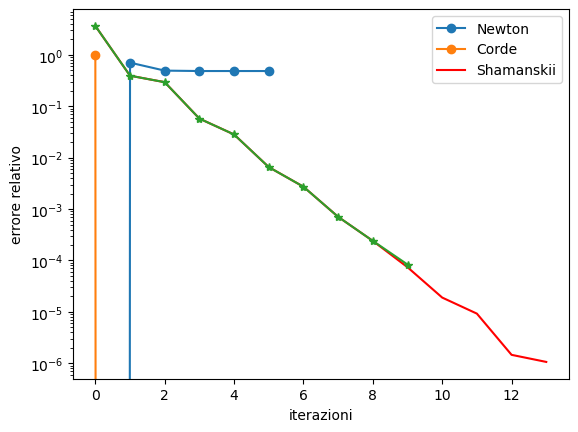

In [24]:
import math
import matplotlib.pyplot as plt
scelta = int(input("scelta sistema"))

if scelta == 1:
    F= lambda x : np.array([
            2*x[0]-math.cos(x[1]),
            math.sin(x[0])+2*x[1],
        ])
    J= lambda x : np.array([
            [2, math.sin(x[1])],
            [math.cos(x[0]), 2]
        ])
elif scelta == 2:
    F= lambda x : np.array([
            x[0]**2+x[1]**2-9,
            x[0]**2+x[1]**2-2
        ])
    J= lambda x : np.array([
            [2*x[0], 2*x[1]],
            [2*x[0], 2*x[1]]
        ])
else :
    F= lambda x : np.array([
            4*x[0]**2+x[1]**2-4,
            x[0]+x[1]-math.sin(x[0]-x[1])
        ])
    J= lambda x : np.array([
            [8*x[0], 2*x[1]],
            [1, 1]
        ])

x0=np.array([-1,1])
nmax=500
tolx=1e-6
tolf=1e-6
x,it,XmN=Newton_Raphson(F,J,x0,tolx,tolf,nmax)
print("zero",x)
if x is not None:
    plt.semilogy(range(it+1),XmN,"-o")
x,it,XmC=corde(F,J,x0,tolx,tolf,nmax)
print("zero corde",x)
if x is not None:
    plt.semilogy(range(it),XmC,"-r")
x,it,XmS=Shamanskii(F,J,x0,tolx,tolf,nmax)
print("zero Shamanskii",x)
if x is not None:
    plt.semilogy(range(it),XmS,"-*")
plt.xlabel('iterazioni')
plt.ylabel('errore relativo')
plt.legend(["Newton","Corde","Shamanskii"])
plt.show()

## Esercizio 2
Scrivere la function `NewtonRaphson_minimo.py`, che implementa il metodo di Newton-Raphson con la variante delle corde
per il calcolo del minimo assoluto (relativo) di una funzione non lineare.

    Tale function
deve assumere come dati in input:
- grad_name: nome della  funzione vettoriale  che contine il gradiente della funzione di cui calcolare lo zero;
- Hess_name: nome della funzione che calcola l' Hessiana della funzione vettoriale;
- X0: vettore contenente le componenti dell'iterato iniziale);
- tolx tolleranza  per il test d'arresto sull'incremento
        ||X_{k+1}-X_k||/||X_{k}||<= tolx
- tolf tolleranza per il test del residuo
        ||F(Xk+1)|| <= tolf;
- NMAX numero massimo di iterazioni.
In output devono essere restituiti il vettore contenente l'approssimazione dello zero x, un vettore contenente l'errore relativo tra due iterati successivi, il numero di iterazioni
effettuate, nit.



In [25]:
def Newton_Raphson_Minimo(gradF,hessF,X0,tolx,tolf,maxIt):
    '''
    metodo di Newton-Raphson per il calcolo del minimo di una funzione scalare. 
    input:
    - gradF: nome della funzione che calcola il gradiente della funzione scalare;
    - hessF: nome della funzione che calcola l'hesseiana della funzione scalare;
    - X0: vettore contenente le componenti dell'iterato iniziale);
    - tolx tolleranza  per il test d'arresto sull'incremento
            ||X_{k+1}-X_k||/||X_{k}||<= tolx
    - tolf tolleranza per il test del residuo
            ||F(Xk+1)|| <= tolf;
    - maxIt numero massimo di iterazioni.
    In output devono essere restituiti il vettore contenente l'approssimazione dello zero x, un vettore contenente l'errore relativo tra due iterati successivi, il numero di iterazioni
    effettuate.
    '''
    it=1
    X_k=[]
    X_k.append(X0)
    grad_k=gradF(X0)
    hess_k=hessF(X0)
    if np.linalg.det(hess_k) == 0:
        print("La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo")
        return None, None,None
    X1=X0-np.linalg.solve(hess_k,grad_k)
    X_k.append(X1)
    while it<maxIt and np.linalg.norm(X1-X0)/np.linalg.norm(X0)>tolx and np.linalg.norm(grad_k)>tolf:
        X0=X1
        grad_k=gradF(X0)
        hess_k=hessF(X0)
        X1=X0-np.linalg.solve(hess_k,grad_k)
        X_k.append(X1)
        it+=1
    return [X1, it, X_k]

Minimo in  [1. 1.] numero di iterazioni  6


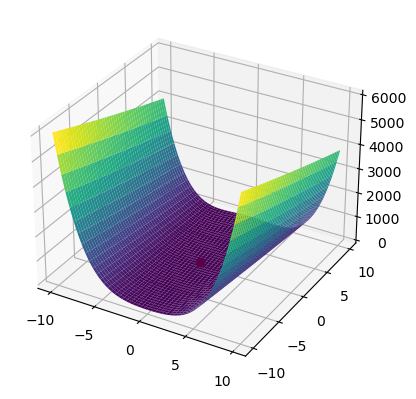

In [26]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
#Il comando successivo permette di interagire con i grafici 3D, ruotare la vista


f= lambda x: 0.5*(0.001*(x[0]-1)**2+(x[0]**2-x[1])**2)
gradiente=  lambda x: np.array([2*x[0]**3-2*x[0]*x[1]+0.001*x[0]-0.001,-x[0]**2+x[1]])
Hess= lambda x: np.array([[6*x[0]**2-2*x[1]+0.001, -2*x[0]],[-2*x[0],1]])

x = np.arange(-10.0, 10.0, 0.1)
y = np.arange(-10.0, 10.0, 0.1)
X, Y = np.meshgrid(x, y)
Z=0.5*(0.001*(X-1)**2+(X**2-Y)**2)

x0=np.array([-10,5])
tolx=1e-10
tolf=1.e-10
nmax=100
xN,contN,XmN= Newton_Raphson_Minimo(gradiente, Hess, x0, tolx, tolf, nmax)
print("Minimo in ",xN, "numero di iterazioni ",contN)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.viridis)
plt.plot(0.0,0.0,f(np.array(xN)),'ro')  #Un pallino nel punto di minimo
# Mostra il grafico
plt.show()

## Esercizio 3
Scrivere una funzione numpy che calcola la norma infinito e la norma 1 di un vettore ed una matrice  e testarla su vettori e matrici  a propria scelta. Confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg

(Ricorda la formula della norma infinito e della norma 1 di una matrice
$||A||_\infty= \max_{j=1,n} \sum_{i} |a_{ij}| $
$\quad ||A||_1= \max_{i=1,n} \sum_{j} |a_{ij}| $)

In [34]:
def myNormInf(A):
    # set the candidate to the min int value
    candidate = -np.inf
    for j in range(len(A)):
        sum = 0
        for i in range(len(A[j])):
            sum += abs(A[i][j])
        if sum > candidate:
            candidate = sum
    return candidate

def myNorm1(A):
    # set the candidate to the min int value
    candidate = -np.inf
    for j in range(len(A)):
        sum = 0
        for i in range(len(A[j])):
            sum += abs(A[j][i])
        if sum > candidate:
            candidate = sum
    return candidate

A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(myNormInf(A))
print(np.linalg.norm(A,1))
print(myNorm1(A))
print(np.linalg.norm(A,np.inf))
            


18
18.0
24
24.0


## Esercizio 4
Implementare una funzione che calcola la norma 2 di una  matrice facendo uso della funzione eigvals del pacchetto numpy.linalg, (np.linalg.eigvals(A)). Testarla sulla matrice A=np.array([[4,-1,6],[2,3,-3],[1,-2,9/2]])   e confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg

In [36]:
def myNorm2(A):
    M = np.dot(A.T, A)
    autoValori = np.linalg.eigvals(M)
    return np.sqrt(max(autoValori))

A=np.array([[4,-1,6],[2,3,-3],[1,-2,9/2]])
print(myNorm2(A))
print(np.linalg.norm(A,2))

9.056251013341882
9.056251013341878
